# Exploratory Data Analysis (EDA)

https://www.kaggle.com/esratmaria/petfinder-pawpularity-prediction-eda

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth',None)

In [2]:
# Averaged-data (DAISEE)
def load_data(datafile):
    df = pd.read_csv(datafile)
    df = df.drop(df.columns[0], axis=1)
    return df

path_av = ('C:/Users/hasegawa-lab-pc/OneDrive - Japan Advanced Institute of Science and Technology/Documents/Dataset/DAiSEE/OpenFace_2.2.0_win_x64/processed/csv/labels/')
df_train_av = load_data(path_av+'average_train.csv')
df_val_av = load_data(path_av+'average_val.csv')
df_test_av = load_data(path_av+'average_test.csv')

train = pd.concat([df_train_av,df_val_av],axis=0,ignore_index=True)
test = df_test_av

print(train.head(2))

    gaze_0_x   gaze_0_y   gaze_0_z   gaze_1_x   gaze_1_y   gaze_1_z  \
0  -0.033459  -0.191076  -0.980521  -0.184261  -0.189855  -0.963797   
1  -0.059442  -0.190243  -0.979789  -0.208618  -0.172357  -0.962489   

    gaze_angle_x   gaze_angle_y   eye_lmk_x_0   eye_lmk_x_1  ...    AU14_c  \
0      -0.111480      -0.193460    339.145333    340.926000  ...  0.076667   
1      -0.137167      -0.184573    332.253333    333.759333  ...  0.106667   

     AU15_c    AU17_c    AU20_c    AU23_c    AU25_c    AU26_c   AU28_c  \
0  0.053333  0.296667  0.006667  0.113333  0.023333  0.026667      0.0   
1  0.016667  0.200000  0.026667  0.000000  0.430000  0.000000      0.0   

     AU45_c  Engagement  
0  0.180000         2.0  
1  0.023333         2.0  

[2 rows x 330 columns]


In [3]:
print('train info: ', train.info())
print('test info: ', test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6787 entries, 0 to 6786
Columns: 330 entries,  gaze_0_x to Engagement
dtypes: float64(330)
memory usage: 17.1 MB
train info:  None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1784 entries, 0 to 1783
Columns: 330 entries,  gaze_0_x to Engagement
dtypes: float64(330)
memory usage: 4.5 MB
test info:  None


In [4]:
print('train describe: ', train.describe())
print('\n')
print('test describe: ', test.describe())

train describe:            gaze_0_x     gaze_0_y     gaze_0_z     gaze_1_x     gaze_1_y  \
count  6787.000000  6787.000000  6787.000000  6787.000000  6787.000000   
mean      0.046374     0.089056    -0.978774    -0.119714     0.099641   
std       0.095672     0.138005     0.023403     0.094332     0.141434   
min      -0.584386    -0.424342    -0.999953    -0.661871    -0.428120   
25%      -0.010101     0.007402    -0.993809    -0.169645     0.018429   
50%       0.046203     0.094776    -0.986785    -0.122073     0.105407   
75%       0.094904     0.175455    -0.973128    -0.071174     0.185361   
max       0.439875     0.594478    -0.789477     0.336258     0.562226   

          gaze_1_z   gaze_angle_x   gaze_angle_y   eye_lmk_x_0   eye_lmk_x_1  \
count  6787.000000    6787.000000    6787.000000   6787.000000   6787.000000   
mean     -0.971118      -0.037459       0.096646    305.211850    307.113977   
std       0.026306       0.094867       0.142677     44.979344     44.912249

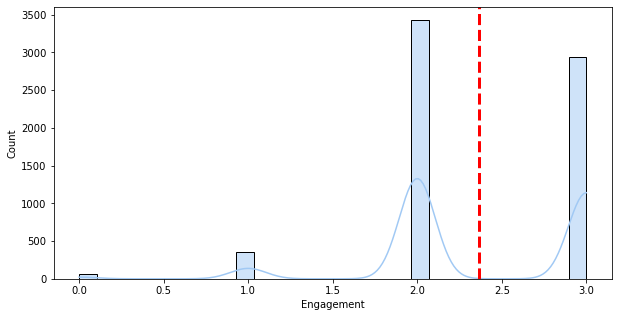

In [5]:
# Distribution

plt.figure(figsize=(10,5))
sns.set_palette("pastel")
sns.histplot(data=train, x='Engagement', kde= True)
plt.axvline(train['Engagement'].mean(), c = 'red', ls = '--', lw=3)

<AxesSubplot:>

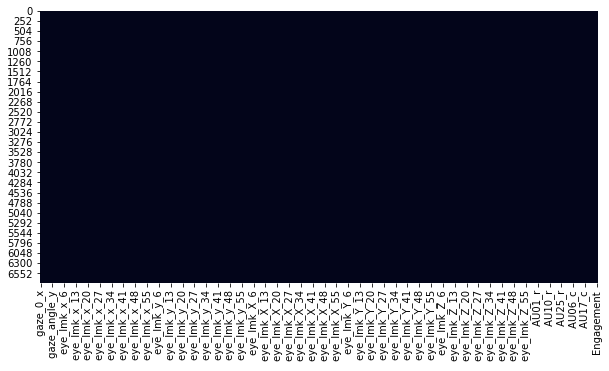

In [6]:
# Check for NULL

plt.figure(figsize=(10,5))
sns.heatmap(train.isna(), cbar=False)

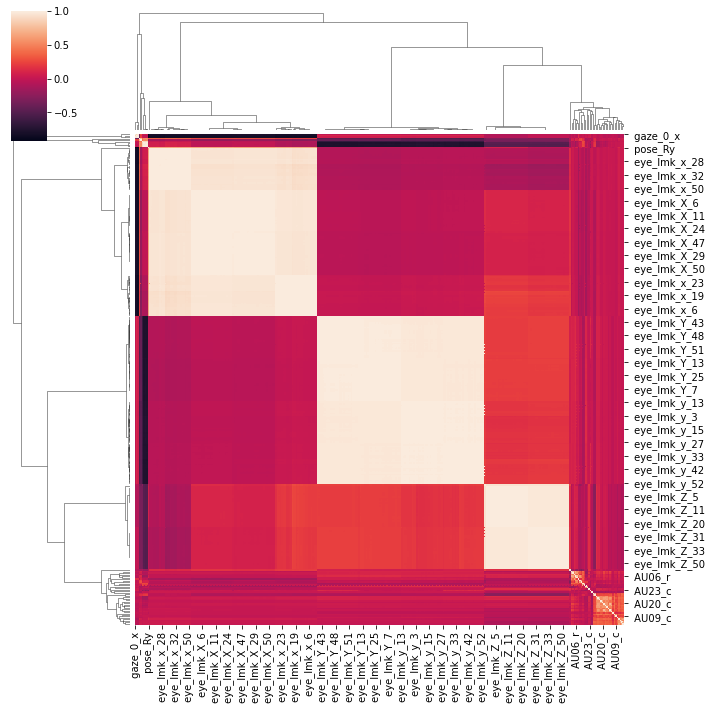

In [7]:
# Checking for correlation

sns.clustermap(train.corr())

<AxesSubplot:>

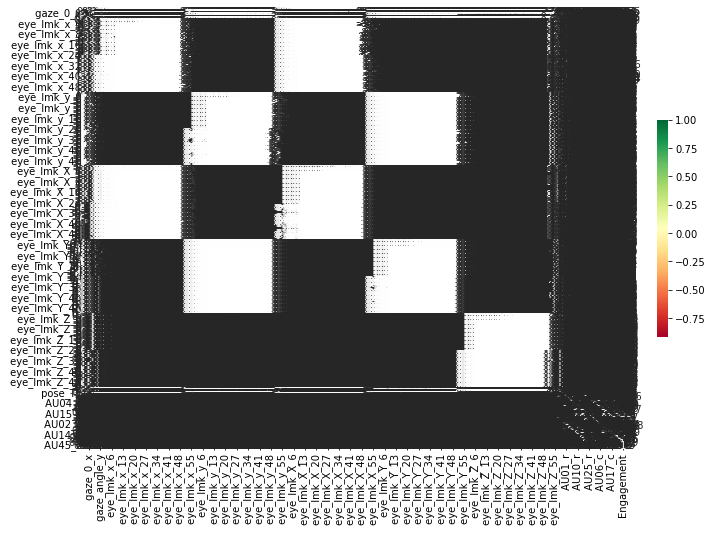

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(), linewidths=0.5, linecolor='white', annot=True, cmap='RdYlGn', cbar_kws={'shrink':0.5})

In [9]:
print(train.corr("pearson")['Engagement'].sort_values(ascending=False))
print("")
print(train.corr("kendall")['Engagement'].sort_values(ascending=False))

Engagement       1.000000
 AU14_c          0.052509
 eye_lmk_y_43    0.046459
 eye_lmk_y_44    0.046358
 eye_lmk_y_42    0.046333
                   ...   
 AU20_r         -0.134450
 AU23_r         -0.143359
 AU17_r         -0.151668
 AU15_r         -0.165118
 AU26_r         -0.167889
Name: Engagement, Length: 330, dtype: float64

Engagement       1.000000
 AU14_c          0.058604
 eye_lmk_y_42    0.044931
 eye_lmk_y_43    0.044765
 eye_lmk_y_44    0.044399
                   ...   
 AU20_c         -0.116498
 AU26_r         -0.121286
 AU23_r         -0.121421
 AU17_r         -0.126862
 AU15_r         -0.129279
Name: Engagement, Length: 330, dtype: float64


In [10]:
# sns.pairplot(train)

IndexError: index 11 is out of bounds for axis 0 with size 11

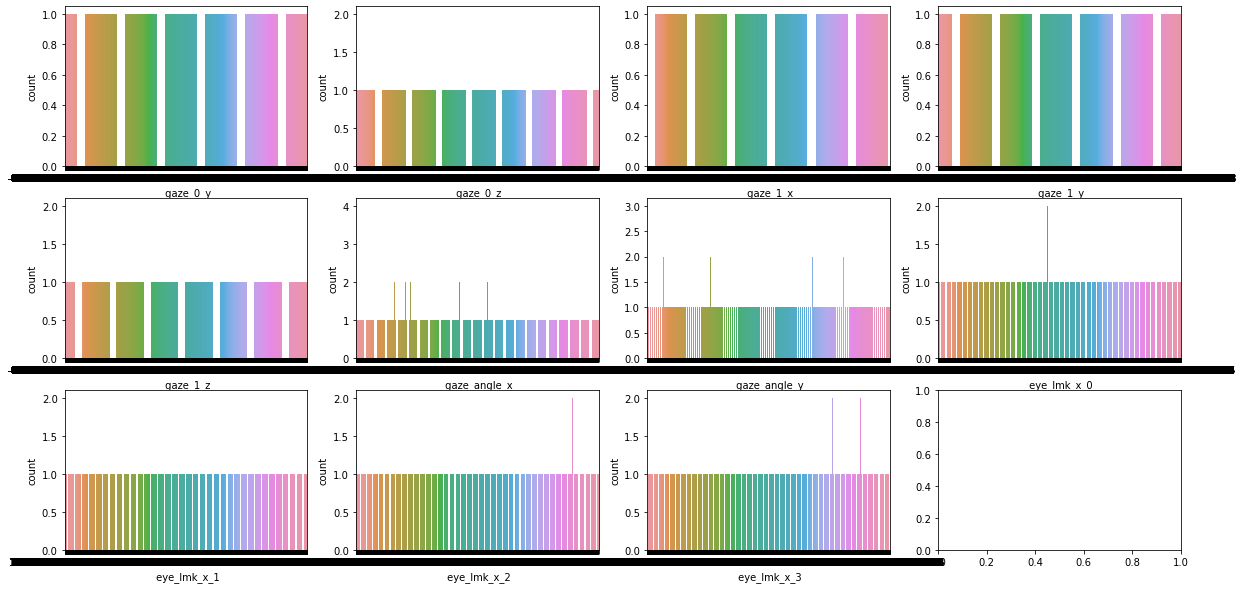

In [12]:
plt.figure(figsize=(20,10))

for i in range(train.shape[1]-2):
    plt.subplot(3,4,i+1)
    sns.countplot(data=train, x=train.columns[1:12][i])
